# Cài đặt thư viện 

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sn 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn import linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedGroupKFold
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras 
from pandas import DataFrame
from sklearn.cluster import KMeans
import warnings
from sklearn import tree
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Machine Learning Tutorial Python - 2: Linear Regression Single Variable

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/homeprice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


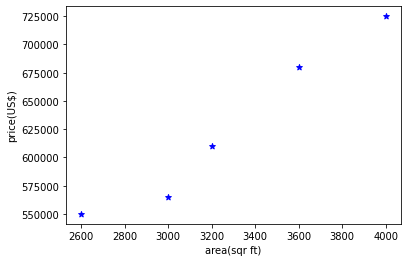

In [ ]:
%matplotlib inline 
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color = 'blue', marker = '*')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [ ]:
reg.predict([[3500]])

array([655873.28767123])

In [ ]:
reg.coef_ # y = mx + b -> m 

array([135.78767123])

In [ ]:
reg.intercept_  # -> b

180616.43835616432

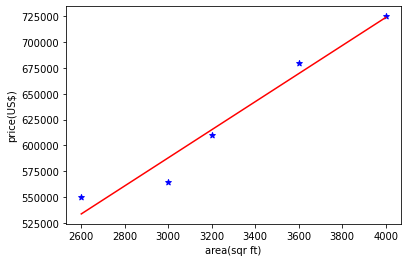

In [ ]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color = 'blue', marker = '*') 
plt.plot(df.area, reg.predict(df[['area']]), color= 'red')

#Machine Learning Tutorial Python - 3: Linear Regression Multiple Variables

In [ ]:
gf = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/homeprice2.csv")
gf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math 
gf.bedrooms.median() # số thập phân, giá trị trung bình trong cột 

4.0

In [ ]:
median_bedrooms = math.floor(gf.bedrooms.median()) # số nguyên 
median_bedrooms

4

In [ ]:
gf.bedrooms = gf.bedrooms.fillna(median_bedrooms) # điền giá trị thiếu bằng giá trị trung bình của cột
gf 

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
rej = linear_model.LinearRegression() 
rej.fit(gf[['area','bedrooms','age']], gf.price)

LinearRegression()

In [ ]:
rej.coef_ # m1 m2 m3 

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
rej.intercept_ # b

221323.00186540396

In [ ]:
rej.predict([[3000,3,15]])

array([579201.19929613])

#Machine Learning Tutorial Python - 6: Dummy Variables & One Hot Encoding

In [ ]:
df6 = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/homeprice6.csv") 
df6

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies6 = pd.get_dummies(df6.town) 
dummies6 

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged6 = pd.concat([df6, dummies6], axis = 'columns') # gộp 2 bảng với nhau 
merged6

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [ ]:
final6 = merged6.drop(['town', 'west windsor'], axis = 'columns')
final6

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
model6 = LinearRegression() 

In [ ]:
X6 = final6.drop(['price'], axis = 'columns') 
X6

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [ ]:
Y6 = final6.price 
Y6

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
model6.fit(X6,Y6)

LinearRegression()

In [ ]:
model6.predict([[2800,0,1]])

array([590775.63964739])

In [ ]:
model6.predict([[3400,0,0]])

array([681241.66845839])

In [ ]:
model6.score(X6,Y6)

0.9573929037221873

In [ ]:
df6

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
le6 = LabelEncoder() 
dfle6 = df6 
dfle6.town = le6.fit_transform(dfle6.town)  
dfle6

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X6 = dfle6[['town', 'area']].values
X6

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
Y6 = dfle6.price 
Y6

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

#Machine Learning Tutorial Python - 7: Training and Testing Data

In [ ]:
df7 = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/carprices7.csv") 
df7

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


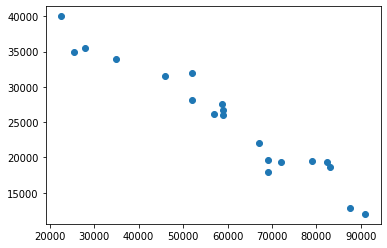

In [ ]:
plt.scatter(df7['Mileage'], df7['Sell Price($)'])

In [ ]:
X7 = df7[['Mileage', 'Age(yrs)']] 
Y7 = df7[['Sell Price($)']]

In [ ]:
X7

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
# kích thước dữ liệu đào tạo 80%  
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X7,Y7, test_size=0.2) 

In [ ]:
len(X7_test)

4

In [ ]:
clf7 = LinearRegression() 

In [ ]:
clf7.fit(X7_train, Y7_train)

LinearRegression()

In [ ]:
clf7.predict(X7_test)

array([[17820.7752482 ],
       [16639.9585746 ],
       [21635.66471866],
       [27846.41410656]])

In [ ]:
clf7.score(X7_test, Y7_test)

0.6360885210982976

#Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification)


In [ ]:
df8 = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/insurence_data8.csv") 
df8

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


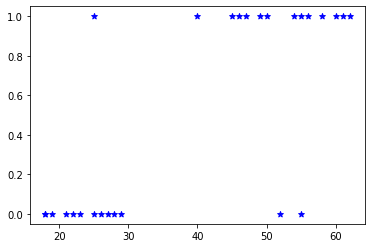

In [ ]:
plt.scatter(df8.age, df8.bought_insurance, marker = '*', color = 'blue')

In [ ]:
X8_train, X8_test, Y8_train, Y8_test = train_test_split(df8[['age']], df8.bought_insurance, test_size= 0.1)

In [ ]:
X8_test 

,age
5,56
6,55
23,45


In [ ]:
model8 = LogisticRegression()

In [ ]:
model8.fit(X8_train, Y8_train)

LogisticRegression()

In [ ]:
model8.predict(X8_test)

array([1, 1, 1])

In [ ]:
model8.score(X8_test, Y8_test)

0.6666666666666666

In [ ]:
model8.predict([[10]])

array([0])

#Machine Learning Tutorial Python - 8 Logistic Regression (Multiclass Classification)

In [ ]:
digits8 = load_digits() 

In [ ]:
dir(digits8)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits8.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

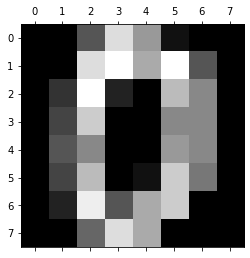

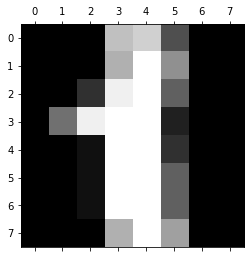

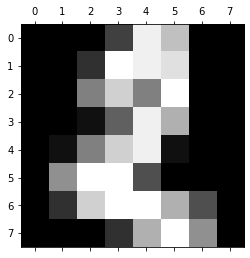

In [ ]:
plt.gray() 
for i in range(3):
  plt.matshow(digits8.images[i])

In [ ]:
X8_1_train, X8_1_test, Y8_1_train, Y8_1_test = train_test_split(digits8.data , digits8.target, test_size= 0.2)

In [ ]:
len(X8_1_train)

1437

In [ ]:
model8_1 = LogisticRegression() 

In [ ]:
model8_1.fit(X8_1_train, Y8_1_train) 

LogisticRegression()

In [ ]:
model8_1.score(X8_1_test, Y8_1_test)

0.9527777777777777

In [ ]:
Y8_predicted = model8_1.predict(X8_1_test) 
cm = confusion_matrix(Y8_1_test, Y8_predicted)  
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 42,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  1, 28,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 37,  0,  0],
       [ 0,  5,  1,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 28]])

Text(69.0, 0.5, 'Truth')

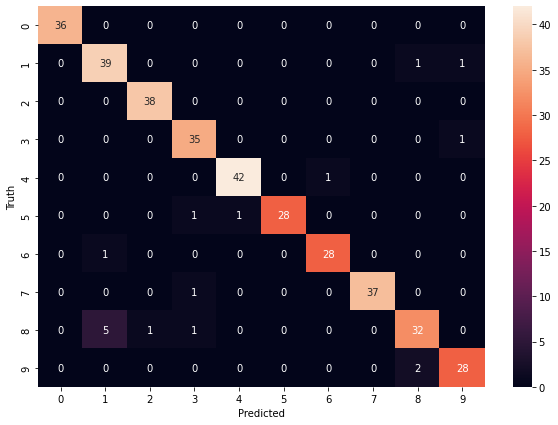

In [ ]:
plt.figure(figsize = (10,7)) 
sn.heatmap(cm, annot = True) 
plt.xlabel('Predicted') 
plt.ylabel('Truth')

#Machine Learning Tutorial Python - 9 Decision Tree

In [ ]:
df9 = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/salaries9.csv") 
df9

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
inputs9 = df9.drop('salary_more_then_100k', axis= 'columns') 
target9 = df9['salary_more_then_100k']

In [ ]:
inputs9

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
target9

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
le_company9 = LabelEncoder()
le_job9 = LabelEncoder() 
le_degree9 = LabelEncoder()

In [ ]:
inputs9['company_n'] = le_company9.fit_transform(inputs9['company']) 
inputs9['job_n'] = le_company9.fit_transform(inputs9['job']) 
inputs9['degree_n'] = le_company9.fit_transform(inputs9['degree']) 
inputs9

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs9_n = inputs9.drop(['company', 'job', 'degree'], axis = 'columns')
inputs9_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
model9 = tree.DecisionTreeClassifier()

In [ ]:
model9.fit(inputs9_n, target9)

DecisionTreeClassifier()

In [ ]:
model9.score(inputs9_n, target9)

1.0

In [ ]:
model9.predict([[2,2,1]])

array([0])

#Machine Learning Tutorial Python - 11 Random Forest

In [ ]:
digits11 = load_digits()

In [ ]:
dir(digits11)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

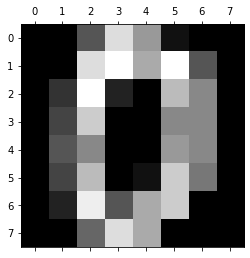

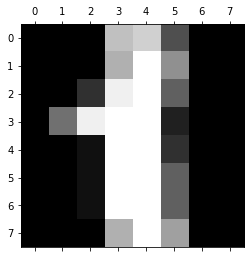

In [ ]:
plt.gray()
for i in range(2):
  plt.matshow(digits11.images[i])

In [ ]:
digits11.data[:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
df11 = pd.DataFrame(digits11.data) 
df11.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
digits11.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
df11['target'] = digits11.target

In [ ]:
df11.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df11.drop(['target'], axis = 'columns'), digits11.target, test_size = 0.2)

In [ ]:
model11 = RandomForestClassifier(n_estimators= 50)
model11.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=50)

In [ ]:
model11.score(X_test, y_test)

0.9638888888888889

#Machine Learning Tutorial Python 12 - K Fold Cross Validation

In [ ]:
digits12 = load_digits() 
X_train, X_test, y_train, y_test = train_test_split(digits12.data, digits12.target, test_size = 0.3)

In [ ]:
lr12 = LogisticRegression()
lr12.fit(X_train, y_train) 
lr12.score(X_test, y_test)

0.9685185185185186

In [ ]:
svm12 = SVC()
svm12.fit(X_train, y_train) 
svm12.score(X_test, y_test)

0.9888888888888889

In [ ]:
rf12 = RandomForestClassifier() 
rf12.fit(X_train, y_train) 
rf12.score(X_test, y_test)

0.9796296296296296

In [ ]:
kf12 = KFold(n_splits = 3) 
kf12

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf12.split([1,2,3,4,5,6,7,8,9]):
  print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train) 
  return model.score(X_test, y_test) 

In [ ]:
folds12 = StratifiedGroupKFold(n_splits = 3)

In [ ]:
scores12_l = [] 
scores12_svm = [] 
scores12_rf = [] 

for train_index, test_index in kf12.split(digits12.data):
  X_train, X_test, y_train, y_test = digits12.data[train_index], digits12.data[test_index],digits12.target[train_index], digits12.target[test_index]
  scores12_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
  scores12_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
  scores12_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

In [ ]:
scores12_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

#Machine Learning Tutorial Python - 13: K Means Clustering Algorithm

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Tutorial Python- DATASET/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


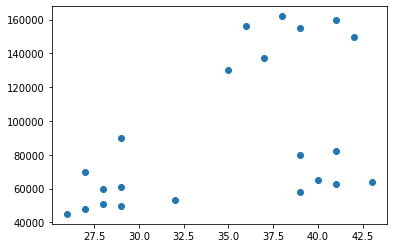

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [ ]:
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluter'] = y_predict

Text(0, 0.5, 'Income($)')

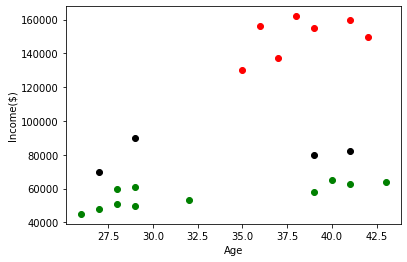

In [ ]:
df1 = df[df.cluter == 0]
df2 = df[df.cluter == 1]
df3 = df[df.cluter ==2 ]

plt.scatter(df1.Age, df1['Income($)'], color ='green') 
plt.scatter(df2.Age, df2['Income($)'], color ='red') 
plt.scatter(df3.Age, df3['Income($)'], color ='black') 

plt.xlabel('Age')
plt.ylabel('Income($)')